In [1]:
import cv2
import numpy as np
import scipy
import os
import matplotlib.pyplot as plt
import pandas as pd
from downsize_corner_finder import detect_corners_on_cropped_Chessboard
from calibrateCamera import *

## Testing findChessboardCorners and methods for improving detection on large images

In [2]:
im = cv2.imread("/Volumes/UOFT NOTES/Rayotek_EZTops Calibration photos/Rayotek Calibration Photos/DSC03365.JPG")
flags = cv2.CALIB_CB_NORMALIZE_IMAGE + cv2.CALIB_CB_ACCURACY

In [6]:
im_scaled = cv2.resize(im,(im.shape[1]//9,im.shape[0]//9),interpolation=cv2.INTER_AREA)
I_new_gray = cv2.cvtColor(im_scaled, cv2.COLOR_BGR2GRAY)
blurred_gray = cv2.bilateralFilter(I_new_gray, 3, 75, 75)

ret,corners = cv2.findChessboardCornersSB(blurred_gray,(6,9),flags)

if ret:
    col_min = np.intc(np.min(corners[:,:,0])*3)
    col_max = np.intc(np.max(corners[:,:,0])*3)
    row_min = np.intc(np.min(corners[:,:,1])*3)
    row_max = np.intc(np.max(corners[:,:,1])*3)
    
    ret2, corners2 = detect_corners_on_cropped_Chessboard(im,(6,9),flags,row_min,row_max,col_min,col_max)
    
else:
    print(ret)

print(row_min,row_max,col_min,col_max)

offset = 500 # 700 pixel offset
x_min = max(col_min-offset,0)
x_max = min(col_max+offset,im.shape[1])
y_min = max(row_min-offset,0)
y_max = min(row_max+offset,im.shape[0])

cropped = im[y_min:y_max,x_min:x_max,:]

plt.imshow(cv2.cvtColor(im[y_min:y_max,x_min:x_max,:],cv2.COLOR_BGR2RGB))
# plt.imshow(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))

False


NameError: name 'row_min' is not defined

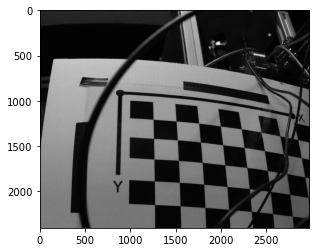

In [7]:
# %matplotlib notebook
gray = cv2.cvtColor(cropped,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

In [9]:
ret3, corners3 = cv2.findChessboardCorners(cropped, (6,3), None)
print(ret3)

# blurred_gray = cv2.GaussianBlur(gray, (7,7), 0)

# ret, thresh = cv2.threshold(blurred_gray, 127, 255, 0)
# element = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5),(1,1))
# erode = cv2.erode(thresh,element)
# element2 = cv2.getStructuringElement(cv2.MORPH_RECT, (7,9))
# dilate = cv2.dilate(erode,element2)

# plt.imshow(dilate)

# ret3, corners3 = cv2.findChessboardCornersSB(dilate, (6,8), flags)

# print(ret3)

False


<IPython.core.display.Javascript object>


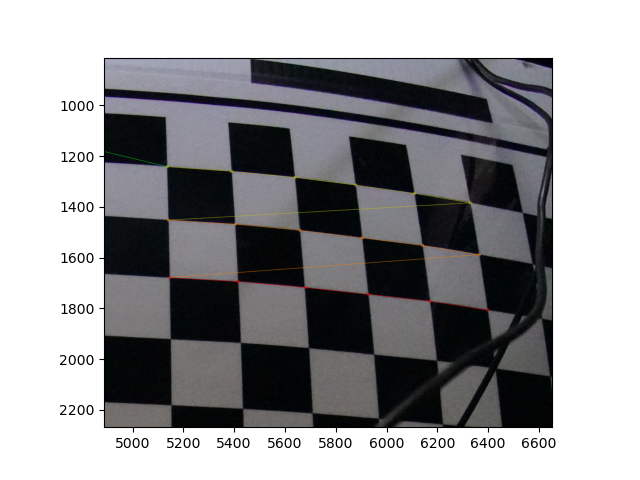

In [10]:
# corners3[:,:,0] += y_min
# corners3[:,:,1] += x_min
# print(im.shape)

# test_c = np.copy(corners3)
# test_c[:,:,0] += x_min
# test_c[:,:,1] += y_min

test_c = corners*3

criteria = (cv2.TERM_CRITERIA_EPS,10000,0.001)
new_corners = cv2.cornerSubPix(cv2.cvtColor(im,cv2.COLOR_BGR2GRAY),corners2,(11,11),(-1,-1),criteria)

%matplotlib notebook
drawn = cv2.drawChessboardCorners(np.copy(im),(6,8),new_corners,ret2)
plt.imshow(cv2.cvtColor(drawn,cv2.COLOR_BGR2RGB))

In [44]:
print(new_corners-corners2)

[[[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]

 [[0. 0.]]]


## Undistorting Images with Fisheye and Pinhole parameters and getting reprojection error 

In [3]:
corner_pth = "/Users/jasonyuan/Desktop/Triumf Lab/Calibration Photos/Underwater_Corners_Rayotek/With OpenCV corner detection - July 6/all_corners_(247, 48, 2).csv"
K_pth = "/Users/jasonyuan/Desktop/Triumf Lab/Calibration Photos/Underwater_Corners_Rayotek/OpenCV calibration - July 8/Fisheye/Offset - -0.5mm/camIntrinsics_K_(3, 3).csv"
Knew_pth = "/Users/jasonyuan/Desktop/Triumf Lab/Calibration Photos/Underwater_Corners_Rayotek/OpenCV calibration - July 8/Fisheye/Offset - -0.5mm/camIntrinsics_Knew_(3, 3).csv"
dist_pth = "/Users/jasonyuan/Desktop/Triumf Lab/Calibration Photos/Underwater_Corners_Rayotek/OpenCV calibration - July 8/Fisheye/Offset - -0.5mm/distortion.csv"
rvecs_pth = "/Users/jasonyuan/Desktop/Triumf Lab/Calibration Photos/Underwater_Corners_Rayotek/OpenCV calibration - July 8/Fisheye/Offset - -0.5mm/rvecs_(247, 3, 1).csv"
tvecs_pth = "/Users/jasonyuan/Desktop/Triumf Lab/Calibration Photos/Underwater_Corners_Rayotek/OpenCV calibration - July 8/Fisheye/Offset - -0.5mm/tvecs_(247, 3, 1).csv"

In [4]:
if K_pth:
    df_K = pd.read_csv(K_pth,header=None)
    K = df_K[0].to_numpy()
    K = K.reshape((3,3))

if Knew_pth:
    df_Knew = pd.read_csv(Knew_pth,header=None)
    Knew = df_Knew[0].to_numpy()
    Knew = Knew.reshape((3,3))

if dist_pth:
    df_dist = pd.read_csv(dist_pth,header=None)
    dist = df_dist[0].to_numpy()

if rvecs_pth:
    df_rvecs = pd.read_csv(rvecs_pth,header=None)
    rvecs = df_rvecs[0].to_numpy()
    rvecs = (rvecs.reshape((-1,3,1))).astype(np.float64)

if tvecs_pth:
    df_tvecs = pd.read_csv(tvecs_pth,header=None)
    tvecs = df_tvecs[0].to_numpy()
    tvecs = (tvecs.reshape((-1,3,1))).astype(np.float64)

In [5]:
df = pd.read_csv(corner_pth,header=None)
imgPoints = df[0].to_numpy()

imgPoints = imgPoints.reshape(-1,nrows*ncols,2)

In [6]:
print(K.shape)
print(dist)

(3, 3)
[ 0.03366945  0.00761962 -0.00044367  0.00063202]


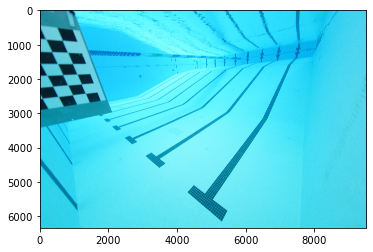

In [6]:
# Pinhole undistortion
# undistorted = cv2.undistort(im,K,dist,newCameraMatrix=new_K)

# Fisheye undistortion
undistorted = get_UndistortedImage(im, K, dist, 1)
plt.imshow(cv2.cvtColor(undistorted,cv2.COLOR_BGR2RGB))

In [7]:
objPoints = generate_objectPoints(6,8,-0.5,25,imgPoints.shape)
cameraModel = 1

In [8]:
num_images = objPoints.shape[0]
e_points = []
overall_mean_error = 0

for n in range(num_images):

    if cameraModel == 0:
        reprojected_points,_ = cv2.projectPoints(np.array([objPoints[n,:,:]]), rvecs[n,:,:], tvecs[n,:,:], K, dist)
    else:
        reprojected_points,_ = cv2.fisheye.projectPoints(np.array([objPoints[n,:,:]]), rvecs[n,:,:], tvecs[n,:,:], K, dist)

    # Squeeze the imgPoints and reprojected_points to be Nx2
    error = np.squeeze(reprojected_points) - np.squeeze(imgPoints[n,:,:])
    
    e_vec = np.sqrt(np.add(np.power(error[:,0],2),np.power(error[:,1],2))).reshape(-1,1)
    
    e_points.append(e_vec)

    overall_mean_error = overall_mean_error + np.mean(e_vec)

e_points = np.array(e_points)   # Shape should be num_images x N x 1

overall_mean_error = overall_mean_error/num_images

print(overall_mean_error)
print(e_points.shape)

3.3957074578889537
(247, 48, 1)


In [9]:
mean_error, error_points = find_reprojection_error(objPoints,imgPoints,K,dist,rvecs,tvecs,cameraModel)
print(mean_error)
print(error_points.shape)

3.3957074578889537
(247, 48, 1)
